In [1]:
import pandas as pd
import seaborn as sb

In [2]:
datos = pd.read_csv('events.csv')

C:\Users\lucia\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
datos_comprados = datos[datos["event"] == "conversion"].drop_duplicates("person")
datos_comprados[["timestamp"]]

,timestamp
220,2018-03-20 17:46:12
2282,2018-04-26 22:28:53
2547,2018-06-10 14:37:50
4245,2018-03-16 13:50:25
6985,2018-02-09 22:07:07
10005,2018-05-17 02:20:29
14236,2018-01-09 16:47:50
15278,2018-05-15 02:31:34
16800,2018-01-23 22:26:36
18502,2018-01-10 18:59:05


Text(33,0.5,'Horario')

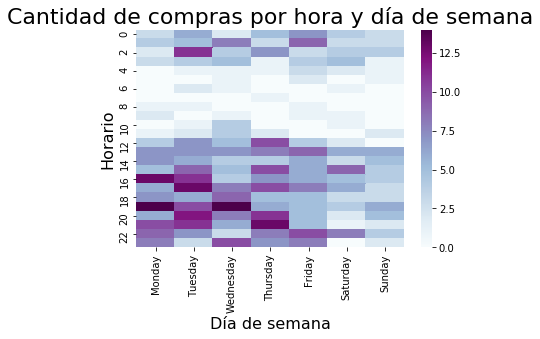

In [4]:
datos_comprados['timestamp'] = pd.to_datetime(datos_comprados['timestamp'])
datos_comprados['hour'] = datos_comprados['timestamp'].dt.hour
datos_comprados['weekday_name'] = datos_comprados['timestamp'].dt.weekday_name

weekdays = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

cross = pd.crosstab(datos_comprados.hour, datos_comprados.weekday_name)
cross = cross.reindex(columns=weekdays)
cross.head()

g = sb.heatmap(cross,  cmap="BuPu")
g.set_title("Cantidad de compras por hora y día de semana", fontsize=22)
g.set_xlabel("Día de semana",fontsize=16)
g.set_ylabel("Horario", fontsize=16)

Text(33,0.5,'Mes')

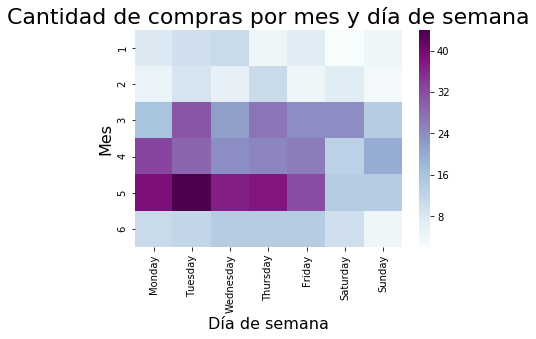

In [5]:
datos_comprados['month'] = datos_comprados['timestamp'].dt.month

cross = pd.crosstab(datos_comprados.month, datos_comprados.weekday_name)
cross = cross.reindex(columns=weekdays)
cross.head()

g = sb.heatmap(cross,  cmap="BuPu")
g.set_title("Cantidad de compras por mes y día de semana", fontsize=22)
g.set_xlabel("Día de semana",fontsize=16)
g.set_ylabel("Mes", fontsize=16)